In [1]:
# 1.Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2.Gathering the data
cc_apps=pd.read_csv("C:/Users/Cemre/Desktop/hopi/data.csv",sep=",",header=0, names=['cid','month','spending','transaction'])

In [3]:
# 3.Explore the data
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74669 entries, 0 to 74668
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cid          74669 non-null  int64  
 1   month        74669 non-null  int64  
 2   spending     74669 non-null  float64
 3   transaction  74669 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 2.3 MB


In [4]:
#MUSTERI NUMARASI STRING OLSUN
cc_apps["cid"] = cc_apps["cid"].astype(str)

In [5]:
#kontrol
for i in cc_apps.columns:
    print(cc_apps[i].apply(lambda x:type(x)).head(1))

0    <class 'str'>
Name: cid, dtype: object
0    <class 'int'>
Name: month, dtype: object
0    <class 'float'>
Name: spending, dtype: object
0    <class 'int'>
Name: transaction, dtype: object


In [7]:
# 4.Check quality
cc_apps.describe()

count     74669
unique    10000
top        8771
freq         12
Name: cid, dtype: object

In [8]:
cc_apps['cid'].describe()

count     74669
unique    10000
top        8771
freq         12
Name: cid, dtype: object

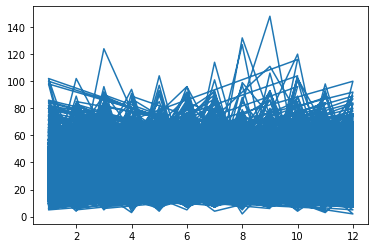

In [9]:
#AYLARA GORE MUSTERI HAREKETLERI
plt.plot(cc_apps.month,cc_apps.transaction)

In [10]:
#HER MUSTERI ICIN ORTALAMA HARCAMA
avg_spending=cc_apps.groupby(['cid']).agg({'spending':"mean"})
#HER MUSTERI ICIN HARCAMANIN STANDART SAPMASI
std_spending=cc_apps.groupby(['cid']).agg({'spending':"std"})
#HER MUSTERI ICIN TOPLAM HARCAMA 
tot_spending=cc_apps.groupby(['cid']).agg({'spending':"sum"})
#HER MUSTERI ICIN TOPLAM ISLEM 
tot_transaction=cc_apps.groupby(['cid']).agg({'transaction':"sum"})
#HER MUSTERININ EN COK HARCAMA YAPTIGI AY 
Most_spending_month=cc_apps.groupby(['cid']).agg({'spending':"max"})
#HER MUSTERININ EN FAZLA ISLEM YAPTIGI AY
Most_transaction_month=cc_apps.groupby(['cid']).agg({'transaction':"max"})

In [11]:
#BIRLESTIRME VE ISIMLENDIRME
cc_apps2=pd.concat([avg_spending,std_spending,tot_spending,tot_transaction,Most_spending_month,Most_transaction_month],axis=1)
cc_apps2

,spending,spending,spending,transaction,spending,transaction
cid,,,,,,
1,102.390000,86.392892,716.73,185,288.44,37
10,73.564286,36.454862,514.95,204,144.65,40
100,76.871667,26.686718,461.23,200,105.40,82
1000,83.035000,48.957232,830.35,276,171.64,39
10000,156.152500,128.001635,1249.22,260,426.09,43
...,...,...,...,...,...,...
9995,100.796000,50.383530,503.98,142,171.66,39
9996,63.520000,24.536695,381.12,147,102.16,34
9997,82.646250,37.333660,661.17,238,154.23,58


In [12]:
#  HER MUSTERININ TOPLAM HARCAMASI
tot_spending=cc_apps.groupby(['cid']).agg({'spending':"sum"})

array([[<AxesSubplot:title={'center':'spending'}>]], dtype=object)

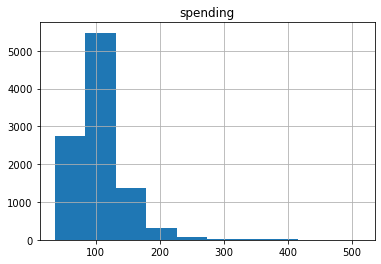

In [13]:
avg_spending.hist()

In [14]:
r_avg_spending=avg_spending.round()

In [15]:
r_avg_spending['spending'].mode()

0    86.0
dtype: float64

In [16]:
avg_spending['spending'].median()

98.445

In [17]:
#EGER MOD<MEDYAN<MEAN ISE DAGILIM SAGDAN CARPIK 
r_avg_spending['spending'].mode() < avg_spending['spending'].median()

0    True
dtype: bool

In [18]:
#TRANSACTION ARTTIKCA ODEME ARTIYOR POZITIF ZAYIF BAG VAR
cc_apps.corr()

,month,spending,transaction
month,1.000000,-0.002688,0.001487
spending,-0.002688,1.000000,0.343424
transaction,0.001487,0.343424,1.000000


<AxesSubplot:>

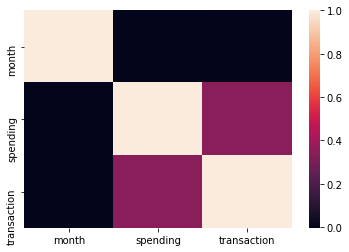

In [19]:
#Korelasyon Gösterim
corr = cc_apps.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [20]:
#MUSTERI OZELINDE ANALIZ ICIN KULLANILABILIR
x=cc_apps.pivot(index='month',columns='cid', values='spending')
x

cid,1,10,100,1000,10000,1001,1002,1003,1004,1005,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
month,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,96.21,NaN,71.90,89.42,38.13,104.09,96.23,...,73.67,63.74,NaN,48.87,NaN,102.04,NaN,46.34,40.75,NaN
2,NaN,91.88,NaN,81.31,265.60,51.83,74.74,228.92,28.00,120.85,...,70.26,49.10,79.15,NaN,59.92,NaN,31.84,52.02,NaN,77.72
3,52.57,80.89,90.28,44.00,63.51,113.27,NaN,130.79,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,46.04,70.27,NaN,NaN,NaN
4,76.98,NaN,105.40,45.12,NaN,36.46,31.11,157.58,266.80,NaN,...,55.08,NaN,35.64,59.55,NaN,NaN,102.16,113.09,75.12,48.33
5,NaN,NaN,58.53,168.15,115.00,173.63,287.28,NaN,NaN,43.76,...,68.80,NaN,NaN,85.67,NaN,171.66,NaN,71.85,113.11,80.12
6,NaN,144.65,NaN,62.42,NaN,NaN,42.92,NaN,NaN,37.99,...,NaN,73.22,NaN,78.28,31.34,123.60,43.02,NaN,NaN,84.66
7,66.42,51.56,64.32,171.64,88.44,85.12,NaN,NaN,41.03,87.14,...,52.92,45.75,90.03,168.44,51.29,NaN,70.43,63.14,80.40,91.64
8,54.54,54.36,NaN,39.42,150.80,61.61,147.37,160.44,50.53,40.17,...,113.85,NaN,147.57,NaN,63.74,NaN,NaN,101.94,76.26,37.97
9,128.21,NaN,39.63,NaN,63.82,44.98,91.44,NaN,NaN,NaN,...,69.88,82.30,99.86,167.54,NaN,60.64,NaN,58.56,75.47,44.28
